In [1]:
import tensorflow as tf
import warnings
tf.__version__

'2.5.0'

In [2]:
# Kiem tra GPU trong may
# tf.config.list_physical_devices('GPU')
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

<ipython-input-2-44d266618fb5>:4: UserWarning: No GPU found. Please ensure you have installed TensorFlow correctly
  warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')


In [3]:
TRAIN_PATH = '/home/thienlong/Exercise/Vietnamese_food_Classification/data/Train'
TEST_PATH = '/home/thienlong/Exercise/Vietnamese_food_Classification/data/Test'
VALID_PATH = '/home/thienlong/Exercise/Vietnamese_food_Classification/data/Validate'
MODELS_PATH = '/home/thienlong/Exercise/Vietnamese_food_Classification/model'
VISUALIZE_PATH = '/home/thienlong/Exercise/Vietnamese_food_Classification/visualize'
TEST_IMAGE = '/home/thienlong/Exercise/Vietnamese_food_Classification/test_image'
WIDTH = 112
HEIGHT = 112
EPOCHS = 200
BATCH_SIZE = 32

In [9]:
#DOC DU LIEU

In [4]:
from tensorflow.keras.preprocessing import image
train_generator = image.ImageDataGenerator(
    rescale = 1./255,  
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 0
)
test_generator = image.ImageDataGenerator(
    rescale = 1./255,    
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 0
)
valid_generator = image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 0
)

In [5]:
generated_train_data = train_generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (WIDTH, HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True,  
    seed=42
)

Found 1981 images belonging to 2 classes.


In [6]:
generated_valid_data = valid_generator.flow_from_directory(
    VALID_PATH,
    target_size = (WIDTH, HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True,
    seed=42
)

Found 214 images belonging to 2 classes.


In [7]:
generated_test_data = test_generator.flow_from_directory(
    TEST_PATH,
    target_size = (WIDTH, HEIGHT),
    class_mode = 'categorical',
    shuffle = False,
)

Found 468 images belonging to 2 classes.


In [ ]:
#THIET LAP MODEL

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [9]:
model = Sequential()

model.add (Conv2D(8, kernel_size=(3,3), activation = 'relu', input_shape=(WIDTH, HEIGHT, 3), padding = 'same'))
model.add (Conv2D(8, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add (MaxPool2D(pool_size=(2,2), strides = 2))

model.add (Conv2D(16, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add (Conv2D(16, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add (Conv2D(16, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add (MaxPool2D(pool_size=(2,2), strides = 2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 16)        0

In [11]:
# Compile
from tensorflow.keras.optimizers import Adam
#model = Model(inputs=input, outputs=x)
model.compile(optimizer = Adam(learning_rate = 1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
vgg16_history = model.fit(
    generated_train_data, 
    validation_data = generated_valid_data,
    validation_steps = generated_valid_data.n // BATCH_SIZE,
    steps_per_epoch = generated_train_data.n  // BATCH_SIZE,
    epochs = EPOCHS,
    verbose = 1
)
model.save(MODELS_PATH + 'cnn.h5')

ss: 0.4346 - val_accuracy: 0.7917
Epoch 64/200
61/61 [==============================] - 27s 444ms/step - loss: 0.4009 - accuracy: 0.8368 - val_loss: 0.4635 - val_accuracy: 0.8073
Epoch 65/200
61/61 [==============================] - 27s 448ms/step - loss: 0.4057 - accuracy: 0.8338 - val_loss: 0.4336 - val_accuracy: 0.7812
Epoch 66/200
61/61 [==============================] - 28s 464ms/step - loss: 0.4003 - accuracy: 0.8343 - val_loss: 0.4822 - val_accuracy: 0.7708
Epoch 67/200
61/61 [==============================] - 28s 459ms/step - loss: 0.3968 - accuracy: 0.8297 - val_loss: 0.4424 - val_accuracy: 0.8021
Epoch 68/200
61/61 [==============================] - 28s 449ms/step - loss: 0.3966 - accuracy: 0.8245 - val_loss: 0.4631 - val_accuracy: 0.7604
Epoch 69/200
61/61 [==============================] - 28s 451ms/step - loss: 0.4046 - accuracy: 0.8297 - val_loss: 0.4499 - val_accuracy: 0.7917
Epoch 70/200
61/61 [==============================] - 28s 458ms/step - loss: 0.4040 - accuracy: 

In [25]:
#DANH GIA MODEL

In [13]:
model = keras.models.load_model('/home/thienlong/Exercise/Vietnamese_food_Classification/modelcnn.h5')

In [14]:
y_test = generated_test_data.classes
y_pred_vgg16 = model.predict(generated_test_data, verbose = 1) 

15/15 [==============================] - 7s 477ms/step


In [15]:
generated_train_data.class_indices.items()

dict_items([('Banh mi', 0), ('Pho', 1)])

In [16]:
print (y_pred_vgg16)

[[1.30506650e-01 8.69493425e-01]
 [9.80709910e-01 1.92901194e-02]
 [1.51024878e-01 8.48975122e-01]
 [9.70563531e-01 2.94364933e-02]
 [9.96121109e-01 3.87888635e-03]
 [8.65317345e-01 1.34682670e-01]
 [7.65175700e-01 2.34824345e-01]
 [2.99751341e-01 7.00248599e-01]
 [9.02956545e-01 9.70435068e-02]
 [6.10259295e-01 3.89740795e-01]
 [4.01668161e-01 5.98331869e-01]
 [2.28433743e-01 7.71566272e-01]
 [9.63353336e-01 3.66467275e-02]
 [9.08969998e-01 9.10299420e-02]
 [1.26203224e-01 8.73796761e-01]
 [9.58680093e-01 4.13198806e-02]
 [8.93235922e-01 1.06764130e-01]
 [6.91331744e-01 3.08668286e-01]
 [7.35804617e-01 2.64195442e-01]
 [7.71763265e-01 2.28236720e-01]
 [1.22493736e-01 8.77506256e-01]
 [9.91241693e-01 8.75824038e-03]
 [9.74850953e-01 2.51490027e-02]
 [9.92218375e-01 7.78158521e-03]
 [9.92118061e-01 7.88195152e-03]
 [8.15256536e-01 1.84743494e-01]
 [7.32487664e-02 9.26751196e-01]
 [6.30341947e-01 3.69658083e-01]
 [8.32270443e-01 1.67729497e-01]
 [9.34735417e-01 6.52646273e-02]
 [9.502216

In [17]:
import pandas as pd

df = pd.DataFrame({
    'Actual'     : generated_test_data.filenames, 
    'VGG16 prediction' : np.argmax(y_pred_vgg16, axis=1)
})  
df.head(50)

,Actual,VGG16 prediction
0,Banh mi/1006.jpg,1
1,Banh mi/1010.jpg,0
2,Banh mi/1011.jpg,1
3,Banh mi/1013.jpg,0
4,Banh mi/1014.jpg,0
5,Banh mi/102.jpg,0
6,Banh mi/1020.jpg,0
7,Banh mi/1021.jpg,1
8,Banh mi/1024.jpg,0
9,Banh mi/1025.jpg,0


In [18]:
df.tail(50)

,Actual,VGG16 prediction
418,Pho/735.jpg,1
419,Pho/739.jpg,0
420,Pho/743.jpg,1
421,Pho/746.jpg,0
422,Pho/756.jpg,1
423,Pho/757.jpg,1
424,Pho/76.jpg,1
425,Pho/762.jpg,0
426,Pho/77.jpg,1
427,Pho/772.jpg,0


In [19]:
def plot_history(history, model_name = ''):

    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    
    axes[0].plot(history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Train')
    axes[0].plot(history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Test')
    axes[0].set_xlabel('Epochs', fontsize = 14)
    axes[0].set_ylabel('Accuracy',fontsize = 14)
    axes[0].set_title(model_name + ' accuracy', fontsize = 14)
    axes[0].legend(loc = 'best')
    
    axes[1].plot(history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Train')
    axes[1].plot(history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Test')
    axes[1].set_xlabel('Epochs', fontsize = 14)
    axes[1].set_ylabel('Loss',fontsize = 14)
    axes[1].set_title(model_name + ' loss', fontsize = 14)
    axes[1].legend(loc = 'best')
    
    fig.savefig(VISUALIZE_PATH + model_name + ' evaluation.png', bbox_inches = 'tight') 
    plt.show()

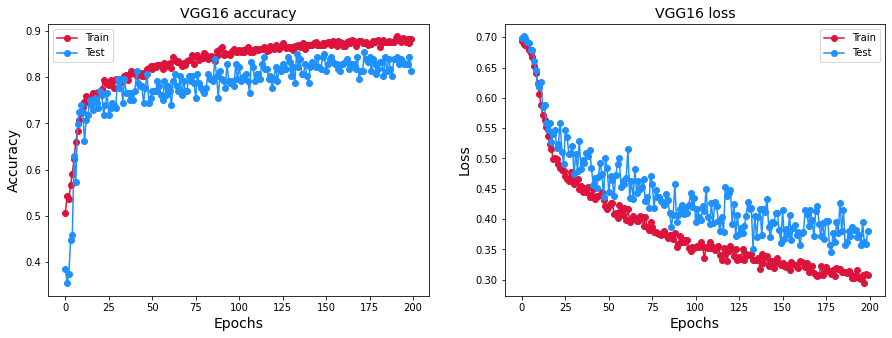

In [20]:
plot_history(vgg16_history, 'VGG16')

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

cf_matrix_vgg16 = confusion_matrix(y_test, np.argmax(y_pred_vgg16, axis=1))
print(classification_report(y_test, np.argmax(y_pred_vgg16, axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       268
           1       0.81      0.83      0.82       200

    accuracy                           0.84       468
   macro avg       0.84      0.84      0.84       468
weighted avg       0.84      0.84      0.84       468



In [22]:
#TEST ANH LAY TU BEN NGOAI

(1, 112, 112, 3)

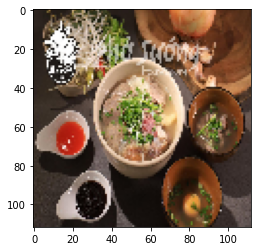

In [26]:
img_test = image.load_img('/home/thienlong/Exercise/Vietnamese_food_Classification/test_image/pho.jpg', target_size = (WIDTH, HEIGHT))
plt.imshow(img_test)
img_test = image.img_to_array(img_test) 
img_test = np.expand_dims(img_test, axis = 0)
img_test.shape

In [27]:
vgg16_model = tf.keras.models.load_model(MODELS_PATH + 'cnn.h5')
classes = model.predict(img_test)

if np.argmax(classes, axis=1) == 1:
  print('Pho')
else:
  print('Banh mi')

Pho
